In [1]:
import os, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from pandas_datareader import data as pdr
from datetime import datetime,timedelta

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
ff_data = pd.read_excel('H://FF_strategy/FF_daily.xlsx')

In [4]:
ff_data = ff_data.set_index("Date")

In [5]:
bab_data = pd.read_excel('H://FF_strategy/BaB_daily.xlsx')

In [6]:
df_bab = bab_data.set_index("Date")

In [7]:
df_bab

,BaB
Date,
07/01/1963,0.004342
07/02/1963,-0.001958
07/03/1963,-0.002134
07/05/1963,-0.001974
07/08/1963,0.004304
...,...
04/24/2024,-0.000413
04/25/2024,0.000596
04/26/2024,-0.002409


In [8]:
date_dt = pd.to_datetime(df_bab.index, format='%m/%d/%Y')  # Convert string to datetime
df_bab.index = date_dt.strftime('%Y%m%d')
df_bab.index = df_bab.index.astype(int)

In [9]:
df_bab

,BaB
Date,
19630701,0.004342
19630702,-0.001958
19630703,-0.002134
19630705,-0.001974
19630708,0.004304
...,...
20240424,-0.000413
20240425,0.000596
20240426,-0.002409


In [10]:
ff_data

,RF,Mkt-RF,Size,Value,Quality,MoM
Date,,,,,,
19630701,0.00012,-0.0067,0.0002,-0.0035,0.0003,-0.0021
19630702,0.00012,0.0079,-0.0028,0.0028,-0.0008,0.0042
19630703,0.00012,0.0063,-0.0018,-0.0010,0.0013,0.0041
19630705,0.00012,0.0040,0.0009,-0.0028,0.0007,0.0007
19630708,0.00012,-0.0063,0.0007,-0.0020,-0.0027,-0.0045
...,...,...,...,...,...,...
20240524,0.00020,0.0072,0.0016,0.0016,0.0030,0.0026
20240528,0.00020,-0.0004,0.0013,-0.0090,0.0011,0.0054
20240529,0.00020,-0.0077,-0.0040,-0.0062,0.0047,0.0025


In [11]:
# Merge the two datasets again, correctly this time
df = ff_data.merge(df_bab, left_index=True, right_index=True, how='inner')


In [12]:
df

,RF,Mkt-RF,Size,Value,Quality,MoM,BaB
Date,,,,,,,
19630701,0.00012,-0.0067,0.0002,-0.0035,0.0003,-0.0021,0.004342
19630702,0.00012,0.0079,-0.0028,0.0028,-0.0008,0.0042,-0.001958
19630703,0.00012,0.0063,-0.0018,-0.0010,0.0013,0.0041,-0.002134
19630705,0.00012,0.0040,0.0009,-0.0028,0.0007,0.0007,-0.001974
19630708,0.00012,-0.0063,0.0007,-0.0020,-0.0027,-0.0045,0.004304
...,...,...,...,...,...,...,...
20240424,0.00021,-0.0001,-0.0029,0.0027,0.0023,-0.0060,-0.000413
20240425,0.00021,-0.0048,-0.0039,-0.0018,0.0040,0.0002,0.000596
20240426,0.00021,0.0104,0.0021,-0.0106,0.0001,0.0116,-0.002409


In [13]:
df.describe()

,RF,Mkt-RF,Size,Value,Quality,MoM,BaB
count,15312.000000,15312.000000,15312.000000,15312.000000,15312.000000,15312.000000,15312.000000
mean,0.000173,0.000275,0.000064,0.000142,0.000138,0.000278,0.000359
std,0.000125,0.010211,0.005467,0.005835,0.004006,0.007751,0.006085
min,0.000000,-0.174400,-0.111900,-0.050200,-0.030100,-0.143700,-0.067065
25%,0.000070,-0.004200,-0.002800,-0.002400,-0.001700,-0.002500,-0.002145
50%,0.000180,0.000500,0.000200,0.000100,0.000100,0.000600,0.000487
75%,0.000240,0.005025,0.003000,0.002500,0.001900,0.003600,0.003057
max,0.000610,0.113500,0.061700,0.067300,0.045100,0.071200,0.079318


In [15]:
correlation_matrix = df.corr()

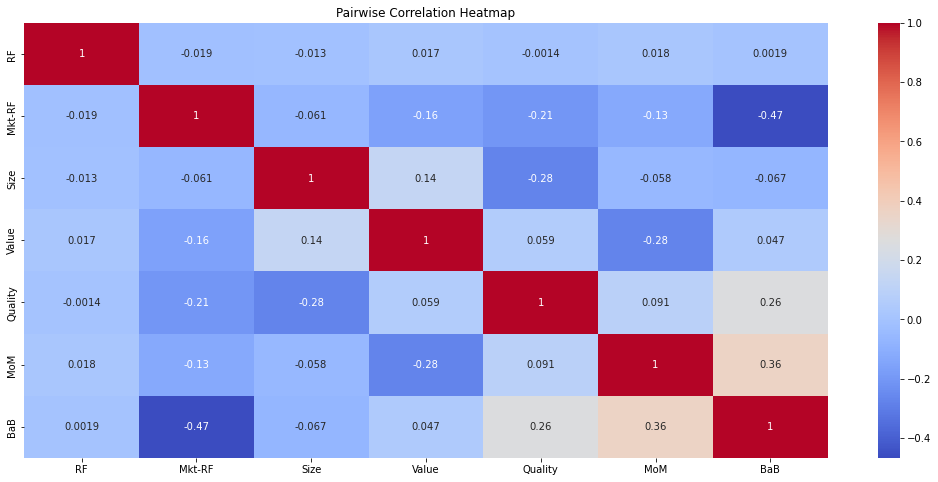

In [17]:
# Create the heatmap
plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Pairwise Correlation Heatmap')

# Show the plot
plt.show()

In [19]:
df.index = pd.to_datetime(df.index, format='%Y%m%d')

In [20]:
df_indices = (df + 1).cumprod(axis=0)*100

In [21]:
df_indices

,RF,Mkt-RF,Size,Value,Quality,MoM,BaB
Date,,,,,,,
1963-07-01,100.012000,99.330000,100.020000,99.650000,100.030000,99.790000,100.434218
1963-07-02,100.024001,100.114707,99.739944,99.929020,99.949976,100.209118,100.237584
1963-07-03,100.036004,100.745430,99.560412,99.829091,100.079911,100.619975,100.023653
1963-07-05,100.048009,101.148411,99.650016,99.549570,100.149967,100.690409,99.826234
1963-07-08,100.060014,100.511176,99.719771,99.350470,99.879562,100.237303,100.255878
...,...,...,...,...,...,...,...
2024-04-24,1402.318291,3032.999016,212.050324,694.729587,735.353924,4448.689528,18490.493972
2024-04-25,1402.612778,3018.440621,211.223328,693.479074,738.295340,4449.579266,18501.519682
2024-04-26,1402.907327,3049.832403,211.666897,686.128196,738.369170,4501.194385,18456.951941


In [22]:
def compute_zscore(df, rol_window=250):
    rolling_mean = df.rolling(rol_window).mean()
    rolling_std = df.rolling(rol_window).std()
    return (df - rolling_mean) / rolling_std




In [23]:
# Compute ratios with respect to "Mkt-RF"
df_ratios = df_indices.div(df_indices["Mkt-RF"], axis=0)
df_ratios.drop(["Mkt-RF", "RF"], axis=1, inplace=True)  # Remove the "Mkt-RF" column to avoid dividing by itself

In [24]:
df_ratios

,Size,Value,Quality,MoM,BaB
Date,,,,,
1963-07-01,1.006947,1.003222,1.007047,1.004631,1.011117
1963-07-02,0.996257,0.998145,0.998355,1.000943,1.001227
1963-07-03,0.988238,0.990904,0.993394,0.998755,0.992836
1963-07-05,0.985186,0.984193,0.990129,0.995472,0.986928
1963-07-08,0.992126,0.988452,0.993716,0.997275,0.997460
...,...,...,...,...,...
2024-04-24,0.069914,0.229057,0.242451,1.466763,6.096439
2024-04-25,0.069978,0.229747,0.244595,1.474132,6.129496
2024-04-26,0.069403,0.224972,0.242102,1.475883,6.051792


In [25]:
# Compute Z-scores for the ratios
ratios_zscores = compute_zscore(df_ratios)

In [26]:
ratios_zscores = ratios_zscores.dropna()

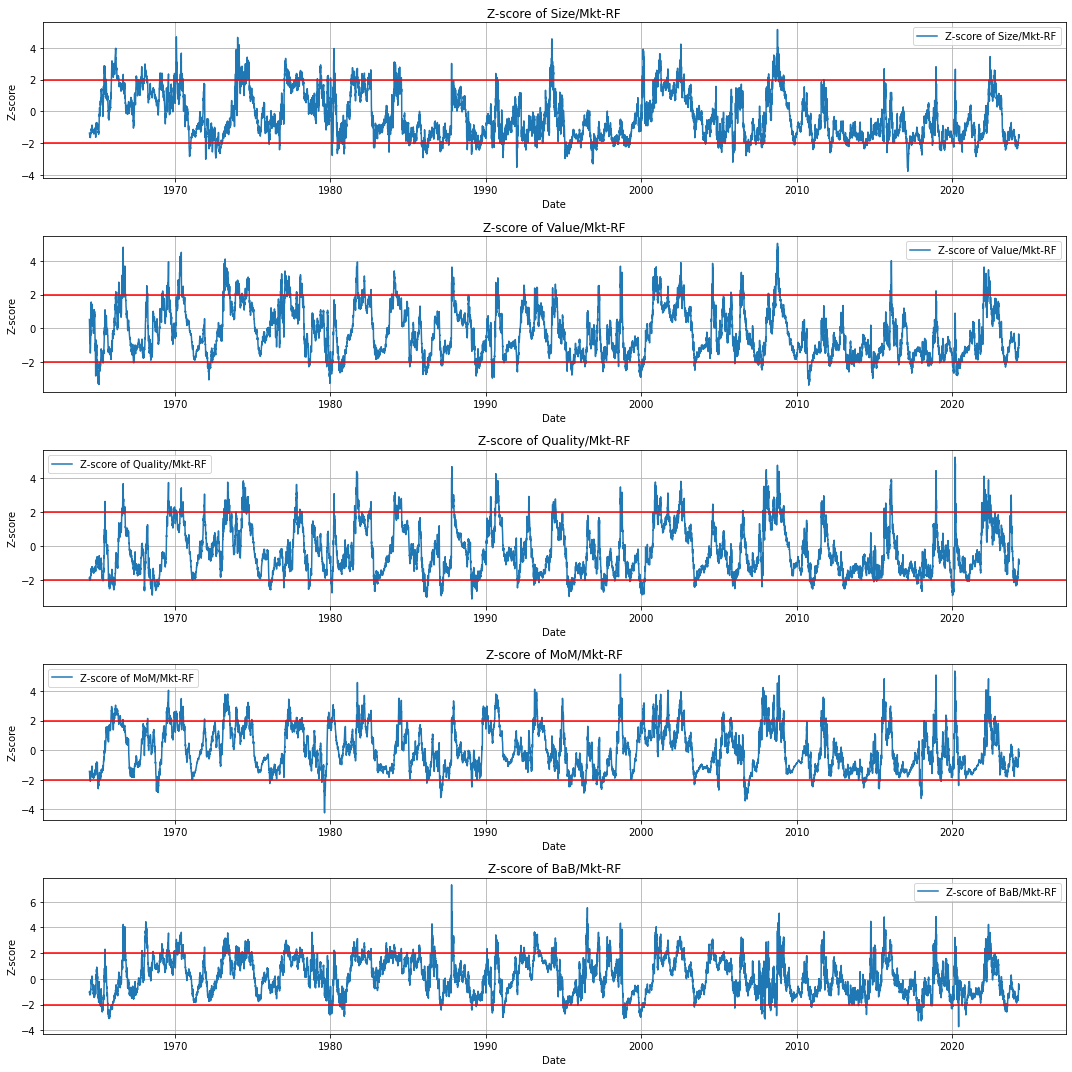

In [27]:
# Plotting
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 15))

# List of column names for iteration
columns = ratios_zscores.columns

for ax, col in zip(axs.flat, columns):
    ax.plot(ratios_zscores.index, ratios_zscores[col], label=f'Z-score of {col}/Mkt-RF')
    ax.axhline(y=2, color='r', linestyle='-')
    ax.axhline(y=-2, color='r', linestyle='-')
    ax.set_title(f'Z-score of {col}/Mkt-RF')
    ax.set_xlabel('Date')
    ax.set_ylabel('Z-score')
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [30]:
ratios_zscores.columns = ['Zscore_Size', 'Zscore_Value','Zscore_Quality','Zscore_MoM','Zscore_BaB']

In [31]:
correlation_matrix_zscores = ratios_zscores.corr()

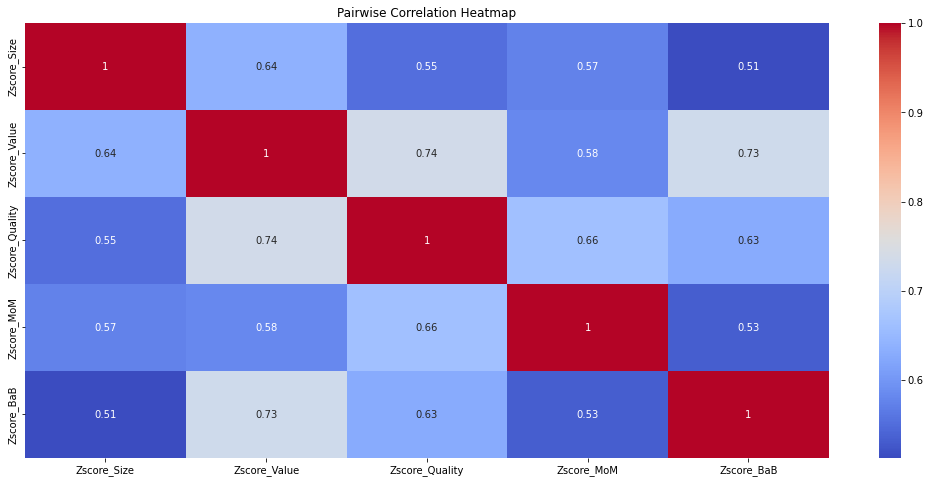

In [33]:
# Create the heatmap
plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix_zscores, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Pairwise Correlation Heatmap')

# Show the plot
plt.show()

In [34]:
ratios_zscores

,Zscore_Size,Zscore_Value,Zscore_Quality,Zscore_MoM,Zscore_BaB
Date,,,,,
1964-06-26,-1.370225,0.519814,-1.878049,-1.431039,-1.032549
1964-06-29,-1.386945,0.284438,-1.872265,-1.470231,-0.975775
1964-06-30,-1.394241,0.183084,-1.805038,-1.511774,-0.970566
1964-07-01,-1.490192,0.006363,-1.940063,-1.625812,-1.134544
1964-07-02,-1.525379,-0.449157,-1.979332,-1.696804,-1.223402
...,...,...,...,...,...
2024-04-24,-1.624146,-0.555977,-1.007486,-0.335673,-0.686720
2024-04-25,-1.601065,-0.495404,-0.889672,-0.231668,-0.596618
2024-04-26,-1.667116,-0.870667,-1.010260,-0.202655,-0.790957


In [35]:
# Merge the two datasets again, correctly this time
df_signals = ratios_zscores.merge(df[['Mkt-RF','Size','Value','Quality','MoM','BaB']], left_index=True, right_index=True, how='inner')

In [36]:
df_signals

,Zscore_Size,Zscore_Value,Zscore_Quality,Zscore_MoM,Zscore_BaB,Mkt-RF,Size,Value,Quality,MoM,BaB
Date,,,,,,,,,,,
1964-06-26,-1.370225,0.519814,-1.878049,-1.431039,-1.032549,0.0026,0.0028,0.0013,-0.0021,0.0005,-0.000270
1964-06-29,-1.386945,0.284438,-1.872265,-1.470231,-0.975775,0.0018,0.0000,-0.0016,0.0011,0.0003,0.004302
1964-06-30,-1.394241,0.183084,-1.805038,-1.511774,-0.970566,0.0003,-0.0009,-0.0012,0.0030,-0.0013,0.000225
1964-07-01,-1.490192,0.006363,-1.940063,-1.625812,-1.134544,0.0062,-0.0015,0.0037,-0.0025,0.0024,-0.002223
1964-07-02,-1.525379,-0.449157,-1.979332,-1.696804,-1.223402,0.0039,0.0005,-0.0024,0.0004,0.0013,-0.000918
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,-1.624146,-0.555977,-1.007486,-0.335673,-0.686720,-0.0001,-0.0029,0.0027,0.0023,-0.0060,-0.000413
2024-04-25,-1.601065,-0.495404,-0.889672,-0.231668,-0.596618,-0.0048,-0.0039,-0.0018,0.0040,0.0002,0.000596
2024-04-26,-1.667116,-0.870667,-1.010260,-0.202655,-0.790957,0.0104,0.0021,-0.0106,0.0001,0.0116,-0.002409


In [37]:
df_signals

,Zscore_Size,Zscore_Value,Zscore_Quality,Zscore_MoM,Zscore_BaB,Mkt-RF,Size,Value,Quality,MoM,BaB
Date,,,,,,,,,,,
1964-06-26,-1.370225,0.519814,-1.878049,-1.431039,-1.032549,0.0026,0.0028,0.0013,-0.0021,0.0005,-0.000270
1964-06-29,-1.386945,0.284438,-1.872265,-1.470231,-0.975775,0.0018,0.0000,-0.0016,0.0011,0.0003,0.004302
1964-06-30,-1.394241,0.183084,-1.805038,-1.511774,-0.970566,0.0003,-0.0009,-0.0012,0.0030,-0.0013,0.000225
1964-07-01,-1.490192,0.006363,-1.940063,-1.625812,-1.134544,0.0062,-0.0015,0.0037,-0.0025,0.0024,-0.002223
1964-07-02,-1.525379,-0.449157,-1.979332,-1.696804,-1.223402,0.0039,0.0005,-0.0024,0.0004,0.0013,-0.000918
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,-1.624146,-0.555977,-1.007486,-0.335673,-0.686720,-0.0001,-0.0029,0.0027,0.0023,-0.0060,-0.000413
2024-04-25,-1.601065,-0.495404,-0.889672,-0.231668,-0.596618,-0.0048,-0.0039,-0.0018,0.0040,0.0002,0.000596
2024-04-26,-1.667116,-0.870667,-1.010260,-0.202655,-0.790957,0.0104,0.0021,-0.0106,0.0001,0.0116,-0.002409


## Backtesting

In [38]:
def simulate_trading_strategy(df, factor_name, zscore_column):
    # Initialize strategy variables
    position = None  # None, 'Size', or 'Mkt-RF'
    total_returns = [1.0]  # Initial returns, represented multiplicatively
    trades = []  # To store trade logs

    # Simulate the trading strategy
    for date, row in df.iterrows():
        if position == factor_name:
            total_returns.append(
                total_returns[-1] * (1 + row[factor_name]))  # Accumulate returns from holding the factor
            if row[zscore_column] >= 2:
                # Switch from factor to Mkt-RF
                trades.append((date, f'Switch from {factor_name} to Mkt-RF', row['Mkt-RF']))
                position = 'Mkt-RF'
        elif position == 'Mkt-RF':
            total_returns.append(total_returns[-1] * (1 + row['Mkt-RF']))  # Accumulate returns from holding 'Mkt-RF'
            # Example condition to switch back to the factor
            if row[zscore_column] <= -2:
                trades.append((date, f'Switch from Mkt-RF to {factor_name}', row[factor_name]))
                position = factor_name
        else:
            total_returns.append(total_returns[-1])  # No change in returns
            if row[zscore_column] <= -2:
                # Buy the factor
                position = factor_name
                trades.append((date, f'Buy {factor_name}', row[factor_name]))

    # Display trades
    trade_log = pd.DataFrame(trades, columns=['Date', 'Action', 'Price at Action'])

    total_returns = total_returns[1:]  # remove the initial 1.0
    benchmark_returns = (df['Mkt-RF']+1).cumprod()

    # Plot the total returns
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, total_returns, label=f'Factor {factor_name} strategy')
    plt.plot(df.index, benchmark_returns, label='Benchmark')
    plt.title(f'Strategy Cumulative Returns Over Time for {factor_name}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

    return trade_log, total_returns[-1]



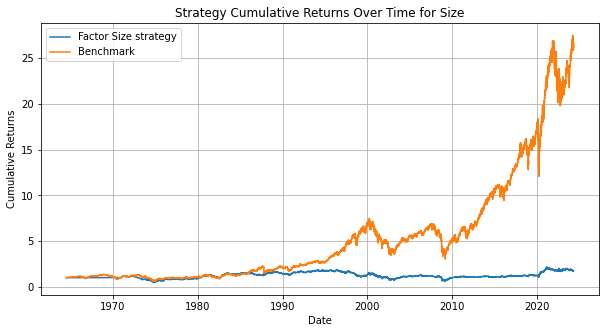

(         Date                      Action  Price at Action
 0  1970-11-25                    Buy Size          -0.0006
 1  1973-11-20  Switch from Size to Mkt-RF          -0.0226
 2  1976-01-19  Switch from Mkt-RF to Size           0.0006
 3  1977-01-12  Switch from Size to Mkt-RF          -0.0068
 4  1980-02-08  Switch from Mkt-RF to Size          -0.0068
 5  1980-03-17  Switch from Size to Mkt-RF          -0.0320
 6  1980-06-10  Switch from Mkt-RF to Size          -0.0041
 7  1981-05-04  Switch from Size to Mkt-RF          -0.0153
 8  1982-10-11  Switch from Mkt-RF to Size          -0.0060
 9  1984-02-06  Switch from Size to Mkt-RF          -0.0167
 10 1985-01-23  Switch from Mkt-RF to Size          -0.0022
 11 1987-10-19  Switch from Size to Mkt-RF          -0.1744
 12 1988-10-20  Switch from Mkt-RF to Size          -0.0144
 13 1990-08-23  Switch from Size to Mkt-RF          -0.0324
 14 1990-12-05  Switch from Mkt-RF to Size           0.0045
 15 1994-02-18  Switch from Size to Mkt-

In [78]:
# df should be your full DataFrame with all necessary columns
# 'Size' is the example factor, and 'Zscore_Size' is its Z-score column
simulate_trading_strategy(df_signals, 'Size', 'Zscore_Size')

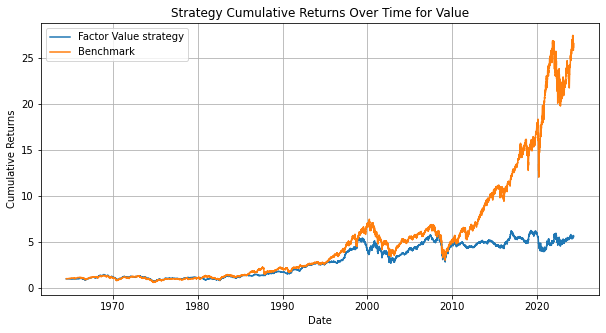

(         Date                       Action  Price at Action
 0  1964-11-16                    Buy Value          -0.0055
 1  1966-03-07  Switch from Value to Mkt-RF          -0.0129
 2  1967-04-27  Switch from Mkt-RF to Value          -0.0056
 3  1968-03-04  Switch from Value to Mkt-RF          -0.0155
 4  1972-02-02  Switch from Mkt-RF to Value          -0.0085
 5  1973-02-01  Switch from Value to Mkt-RF          -0.0116
 6  1978-08-02  Switch from Mkt-RF to Value          -0.0063
 7  1981-08-24  Switch from Value to Mkt-RF          -0.0297
 8  1985-02-04  Switch from Mkt-RF to Value          -0.0047
 9  1987-10-19  Switch from Value to Mkt-RF          -0.1744
 10 1989-04-21  Switch from Mkt-RF to Value          -0.0008
 11 1990-08-23  Switch from Value to Mkt-RF          -0.0324
 12 1991-03-05  Switch from Mkt-RF to Value          -0.0085
 13 1992-06-09  Switch from Value to Mkt-RF          -0.0086
 14 1995-03-14  Switch from Mkt-RF to Value          -0.0029
 15 1997-03-31  Switch f

In [79]:
simulate_trading_strategy(df_signals, 'Value', 'Zscore_Value')

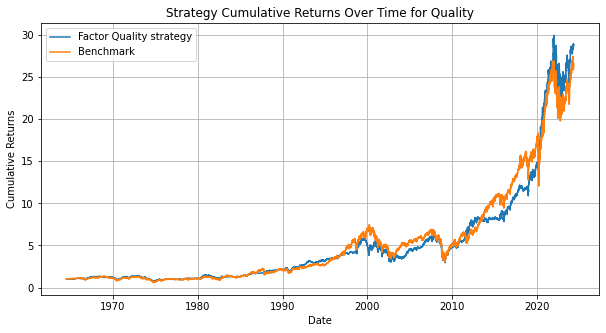

(         Date                         Action  Price at Action
 0  1965-05-13                    Buy Quality           0.0003
 1  1965-06-28  Switch from Quality to Mkt-RF          -0.0188
 2  1965-09-27  Switch from Mkt-RF to Quality           0.0008
 3  1966-08-01  Switch from Quality to Mkt-RF          -0.0153
 4  1968-01-05  Switch from Mkt-RF to Quality          -0.0076
 5  1969-07-10  Switch from Quality to Mkt-RF          -0.0161
 6  1976-01-19  Switch from Mkt-RF to Quality          -0.0040
 7  1977-09-21  Switch from Quality to Mkt-RF          -0.0075
 8  1978-08-01  Switch from Mkt-RF to Quality          -0.0017
 9  1980-03-25  Switch from Quality to Mkt-RF          -0.0055
 10 1982-10-20  Switch from Mkt-RF to Quality           0.0007
 11 1984-02-06  Switch from Quality to Mkt-RF          -0.0167
 12 1985-12-16  Switch from Mkt-RF to Quality           0.0045
 13 1987-10-19  Switch from Quality to Mkt-RF          -0.1744
 14 1989-01-24  Switch from Mkt-RF to Quality          

In [80]:
simulate_trading_strategy(df_signals, 'Quality', 'Zscore_Quality')

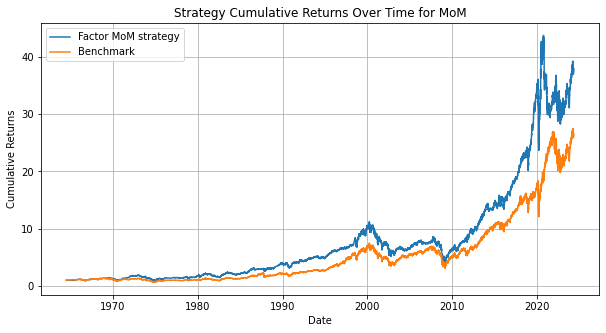

(         Date                     Action  Price at Action
 0  1964-07-16                    Buy MoM           0.0008
 1  1965-11-15  Switch from MoM to Mkt-RF           0.0011
 2  1968-10-14  Switch from Mkt-RF to MoM          -0.0041
 3  1969-06-10  Switch from MoM to Mkt-RF          -0.0079
 4  1971-02-08  Switch from Mkt-RF to MoM          -0.0068
 5  1971-11-23  Switch from MoM to Mkt-RF          -0.0080
 6  1976-02-03  Switch from Mkt-RF to MoM          -0.0045
 7  1977-02-24  Switch from MoM to Mkt-RF          -0.0062
 8  1979-06-12  Switch from Mkt-RF to MoM          -0.0057
 9  1979-11-06  Switch from MoM to Mkt-RF          -0.0061
 10 1986-03-12  Switch from Mkt-RF to MoM          -0.0040
 11 1987-10-19  Switch from MoM to Mkt-RF          -0.1744
 12 1989-01-30  Switch from Mkt-RF to MoM          -0.0004
 13 1989-10-13  Switch from MoM to Mkt-RF          -0.0552
 14 1995-05-10  Switch from Mkt-RF to MoM          -0.0064
 15 1998-07-24  Switch from MoM to Mkt-RF          -0.00

In [81]:
simulate_trading_strategy(df_signals, 'MoM', 'Zscore_MoM')

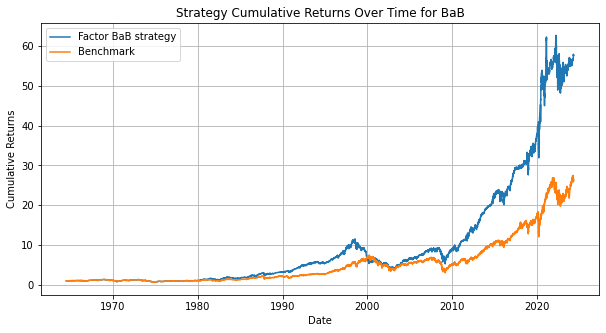

(         Date                     Action  Price at Action
 0  1965-02-24                    Buy BaB         0.000962
 1  1965-06-28  Switch from BaB to Mkt-RF        -0.018800
 2  1965-09-02  Switch from Mkt-RF to BaB        -0.003774
 3  1966-08-19  Switch from BaB to Mkt-RF        -0.007600
 4  1979-11-26  Switch from Mkt-RF to BaB        -0.005035
 5  1980-03-27  Switch from BaB to Mkt-RF        -0.018500
 6  1980-08-11  Switch from Mkt-RF to BaB        -0.002388
 7  1981-06-16  Switch from BaB to Mkt-RF        -0.011600
 8  1987-02-04  Switch from Mkt-RF to BaB        -0.005865
 9  1987-10-16  Switch from BaB to Mkt-RF        -0.048700
 10 1989-01-27  Switch from Mkt-RF to BaB         0.000950
 11 1990-01-26  Switch from BaB to Mkt-RF        -0.003600
 12 1990-05-17  Switch from Mkt-RF to BaB        -0.001901
 13 1990-08-21  Switch from BaB to Mkt-RF        -0.020000
 14 1991-01-30  Switch from Mkt-RF to BaB        -0.010799
 15 1992-03-27  Switch from BaB to Mkt-RF        -0.0109

In [82]:
simulate_trading_strategy(df_signals, 'BaB', 'Zscore_BaB')

## Clustering 

In [39]:
from sklearn.manifold import TSNE

In [48]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
    colors = sns.color_palette('tab20', n_colors=4)  # Choose a larger color palette

    for index, perplexity in enumerate(perplexities):
        # Perform t-SNE
        print('\nPerforming t-SNE with perplexity {} and {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')

        # Prepare the data for seaborn
        print('Creating plot for this t-SNE visualization..')
        df = pd.DataFrame({'x': X_reduced[:, 0], 'y': X_reduced[:, 1], 'label': y_data})
        df['label'] = df['label'].astype(int)

        # Get the unique levels in the 'label' column
        unique_labels = df['label'].unique()

        # Create a dictionary mapping each level to a color
        color_dict = dict(zip(unique_labels, colors[:len(unique_labels)]))

        # Map the colors to the 'label' column
        df['color'] = df['label'].map(color_dict)

        # Draw the plot
        plt.figure(figsize=(14, 10))
        sns.scatterplot(data=df, x='x', y='y', hue='label', style='label', palette=color_dict, markers=True)
        plt.title("Perplexity: {} and Max_iter: {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('Saving this plot as an image in the present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

In [49]:
Q1 = df['Mkt-RF'].quantile(0.25)
Q2 = df['Mkt-RF'].quantile(0.50)
Q3 = df['Mkt-RF'].quantile(0.75)

In [50]:
# Define the quantile intervals and labels
quantile_intervals = [float('-inf'), Q1, Q2, Q3, float('inf')]
labels = [1, 2, 3, 4]

# Use pd.cut() to categorize the data based on the intervals and labels
df['Quantile Labels'] = pd.cut(df['Mkt-RF'], bins=quantile_intervals, labels=labels, include_lowest=True)

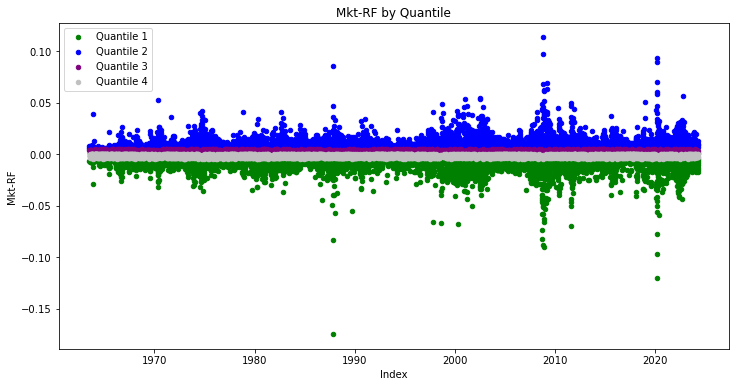

In [51]:
# Assuming you have 'carbon_data' DataFrame with 'Quantile Labels' and 'Carbon Price' columns

# Define neutral colors for each quantile label
quantile_colors = ['green', 'blue', 'purple', 'silver']  # Add more colors if needed


# Create a dictionary to store quantile label names and their corresponding colors
quantile_legend_mapping = {}
for label, color in zip(df['Quantile Labels'].unique(), quantile_colors):
    quantile_legend_mapping[f'Quantile {label}'] = color

plt.figure(figsize=(12, 6))

for label, color in quantile_legend_mapping.items():
    label_data = df[df['Quantile Labels'] == int(label.split()[1])]
    plt.scatter(label_data.index, label_data['Mkt-RF'], s=20, marker='o', label=label, color=color)

# Sort legend entries based on quantile label names
sorted_legend = [label for label, _ in sorted(quantile_legend_mapping.items(), key=lambda x: int(x[0].split()[1]))]
plt.legend(sorted_legend)

plt.title('Mkt-RF by Quantile')
plt.xlabel('Index')
plt.ylabel('Mkt-RF')
plt.show()

In [53]:
X_tsne = df.drop(['Mkt-RF','RF','Quantile Labels'], axis=1)
y_pre_tsne = df['Quantile Labels']


Performing t-SNE with perplexity 2 and 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 15312 samples in 0.014s...
[t-SNE] Computed neighbors for 15312 samples in 0.222s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15312
[t-SNE] Computed conditional probabilities for sample 2000 / 15312
[t-SNE] Computed conditional probabilities for sample 3000 / 15312
[t-SNE] Computed conditional probabilities for sample 4000 / 15312
[t-SNE] Computed conditional probabilities for sample 5000 / 15312
[t-SNE] Computed conditional probabilities for sample 6000 / 15312
[t-SNE] Computed conditional probabilities for sample 7000 / 15312
[t-SNE] Computed conditional probabilities for sample 8000 / 15312
[t-SNE] Computed conditional probabilities for sample 9000 / 15312
[t-SNE] Computed conditional probabilities for sample 10000 / 15312
[t-SNE] Computed conditional probabilities for sample 11000 / 15312
[t-SNE] Computed conditional probabilities for sample 12

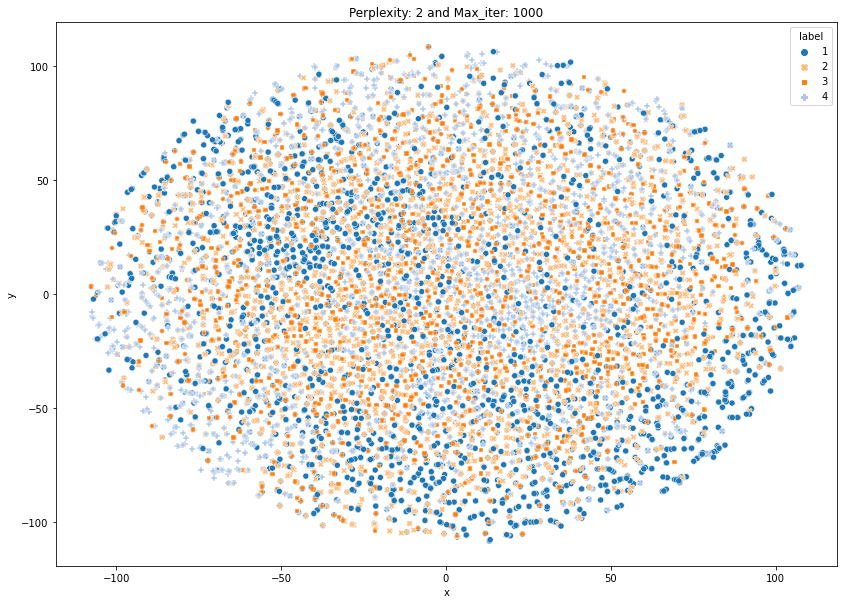

Done

Performing t-SNE with perplexity 5 and 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 15312 samples in 0.034s...
[t-SNE] Computed neighbors for 15312 samples in 0.495s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15312
[t-SNE] Computed conditional probabilities for sample 2000 / 15312
[t-SNE] Computed conditional probabilities for sample 3000 / 15312
[t-SNE] Computed conditional probabilities for sample 4000 / 15312
[t-SNE] Computed conditional probabilities for sample 5000 / 15312
[t-SNE] Computed conditional probabilities for sample 6000 / 15312
[t-SNE] Computed conditional probabilities for sample 7000 / 15312
[t-SNE] Computed conditional probabilities for sample 8000 / 15312
[t-SNE] Computed conditional probabilities for sample 9000 / 15312
[t-SNE] Computed conditional probabilities for sample 10000 / 15312
[t-SNE] Computed conditional probabilities for sample 11000 / 15312
[t-SNE] Computed conditional probabilities for sam

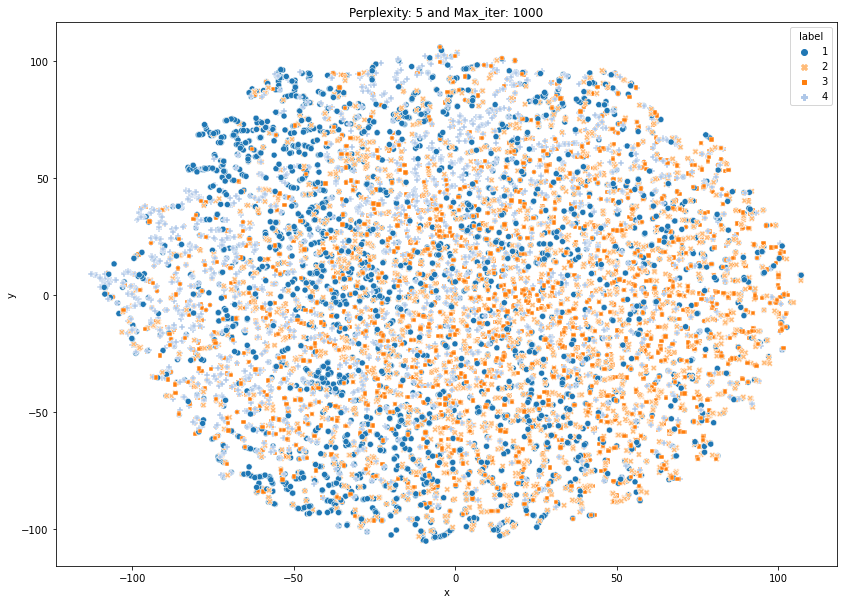

Done

Performing t-SNE with perplexity 10 and 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 15312 samples in 0.041s...
[t-SNE] Computed neighbors for 15312 samples in 0.730s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15312
[t-SNE] Computed conditional probabilities for sample 2000 / 15312
[t-SNE] Computed conditional probabilities for sample 3000 / 15312
[t-SNE] Computed conditional probabilities for sample 4000 / 15312
[t-SNE] Computed conditional probabilities for sample 5000 / 15312
[t-SNE] Computed conditional probabilities for sample 6000 / 15312
[t-SNE] Computed conditional probabilities for sample 7000 / 15312
[t-SNE] Computed conditional probabilities for sample 8000 / 15312
[t-SNE] Computed conditional probabilities for sample 9000 / 15312
[t-SNE] Computed conditional probabilities for sample 10000 / 15312
[t-SNE] Computed conditional probabilities for sample 11000 / 15312
[t-SNE] Computed conditional probabilities for sa

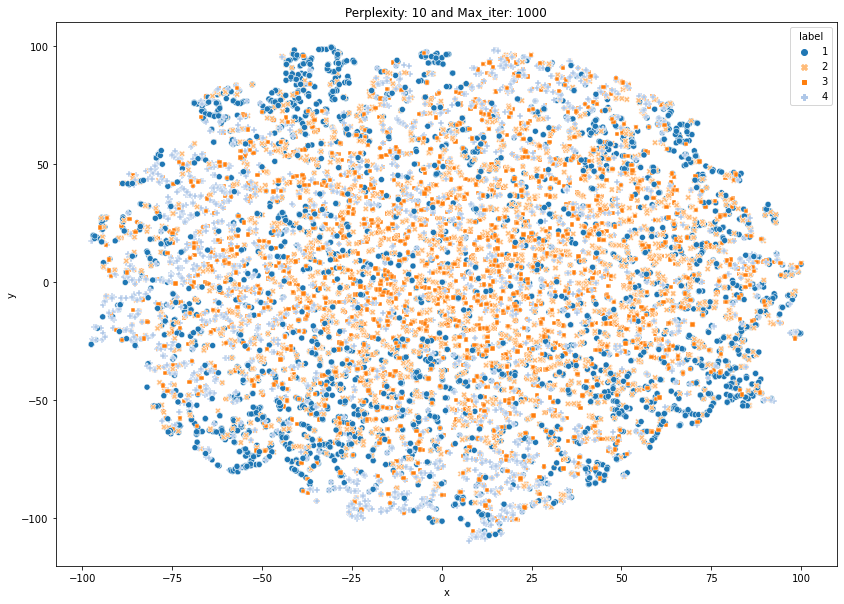

Done

Performing t-SNE with perplexity 20 and 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 15312 samples in 0.025s...
[t-SNE] Computed neighbors for 15312 samples in 0.621s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15312
[t-SNE] Computed conditional probabilities for sample 2000 / 15312
[t-SNE] Computed conditional probabilities for sample 3000 / 15312
[t-SNE] Computed conditional probabilities for sample 4000 / 15312
[t-SNE] Computed conditional probabilities for sample 5000 / 15312
[t-SNE] Computed conditional probabilities for sample 6000 / 15312
[t-SNE] Computed conditional probabilities for sample 7000 / 15312
[t-SNE] Computed conditional probabilities for sample 8000 / 15312
[t-SNE] Computed conditional probabilities for sample 9000 / 15312
[t-SNE] Computed conditional probabilities for sample 10000 / 15312
[t-SNE] Computed conditional probabilities for sample 11000 / 15312
[t-SNE] Computed conditional probabilities for sa

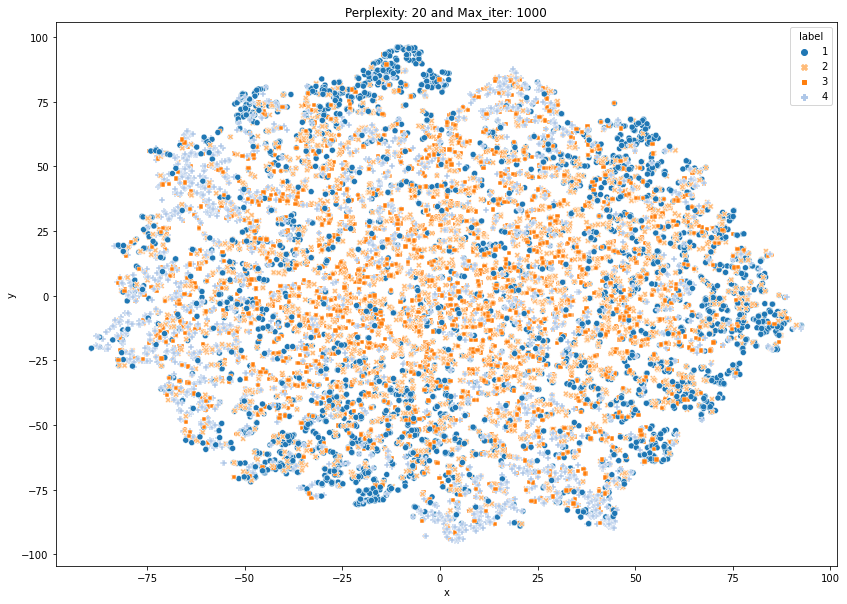

Done

Performing t-SNE with perplexity 50 and 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 15312 samples in 0.021s...
[t-SNE] Computed neighbors for 15312 samples in 1.124s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15312
[t-SNE] Computed conditional probabilities for sample 2000 / 15312
[t-SNE] Computed conditional probabilities for sample 3000 / 15312
[t-SNE] Computed conditional probabilities for sample 4000 / 15312
[t-SNE] Computed conditional probabilities for sample 5000 / 15312
[t-SNE] Computed conditional probabilities for sample 6000 / 15312
[t-SNE] Computed conditional probabilities for sample 7000 / 15312
[t-SNE] Computed conditional probabilities for sample 8000 / 15312
[t-SNE] Computed conditional probabilities for sample 9000 / 15312
[t-SNE] Computed conditional probabilities for sample 10000 / 15312
[t-SNE] Computed conditional probabilities for sample 11000 / 15312
[t-SNE] Computed conditional probabilities for s

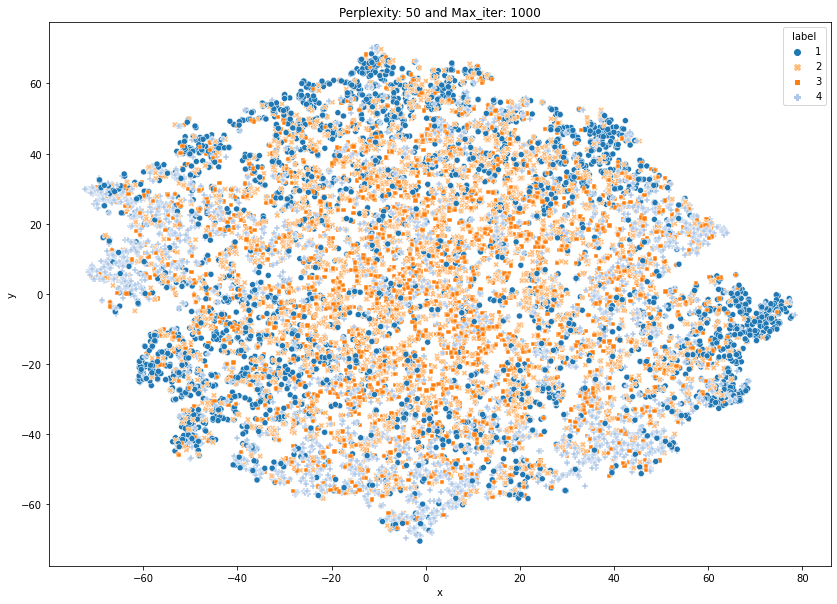

Done


In [54]:
perform_tsne(X_data = X_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])